In [5]:
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
from PIL import Image

In [6]:
image = Image.open("images/elon.jpeg")

In [10]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0)
    ]
)

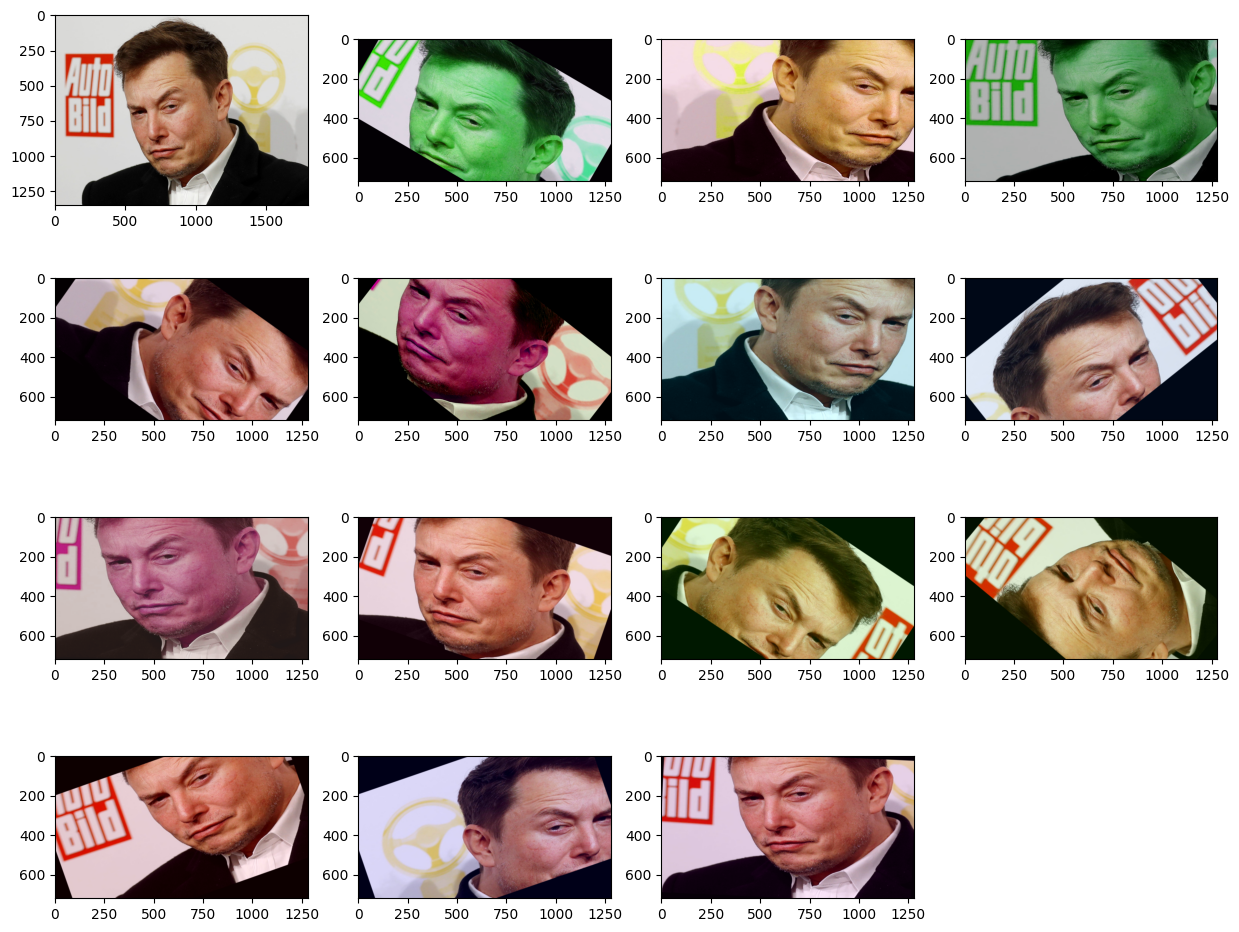

In [11]:
images_list = [image]
image = np.array(image)
for i in range(15):
    augmentations = transform(image=image)
    augmented_img = augmentations["image"]
    images_list.append(augmented_img)
plot_examples(images_list)